#### Data Description

The Habermans survival's Dataset contains cases from a study that was conducted between 1958 to 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer


#### Attribute information :

1. Age of Patients at time of  operation (numerical value)
2. Operation year of patients (numerical value)
3. Positive Axillary Node count of patients --> Symptom of Cancer Detection (numerical value)
4. Survival Status of patients after years --> class Attribute (1 = Survived before and after 5years, 2 =patients died within 5years or so)

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset of Haberman's Survival Dataset
habs_data = pd.read_csv('D:\Python_Practice\Projects\haberman.csv')

In [3]:
# Describes the rows and Columns present in the dataset
habs_data.shape

(305, 4)

In [4]:
# Add Column labels Name as No Headers in the data
habs_data.columns = ['Age','Op_Year','Axillary_node','Surv_Status_5yearsLater']

In [5]:
# the data classification for Survived and vice-versa
habs_data['Surv_Status_5yearsLater'] = habs_data['Surv_Status_5yearsLater'].map({1:'yes',2:'no'})

In [6]:
habs_data.head()

,Age,Op_Year,Axillary_node,Surv_Status_5yearsLater
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [7]:
habs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                        305 non-null int64
Op_Year                    305 non-null int64
Axillary_node              305 non-null int64
Surv_Status_5yearsLater    305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [8]:
habs_data.describe()

,Age,Op_Year,Axillary_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


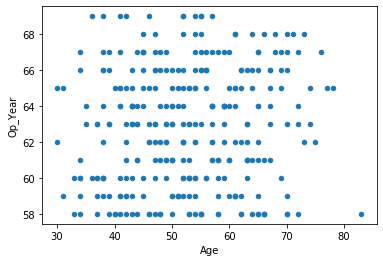

In [9]:
# scatter plot for determining age of patients with cancer 
habs_data.plot(kind="scatter",x="Age",y="Op_Year")
plt.show()

In [10]:
print("Number of rows : " +str(habs_data.shape[0]))
print('Number of columns : ' +str(habs_data.shape[1]))
print('Collumns : ' + ', '.join(habs_data))

print("-"*100)

print('\nTarget Variable Distribution')
print(habs_data.iloc[:,-1].value_counts())
print("-"*100)
print(habs_data.iloc[:,-1].value_counts(normalize=True))

Number of rows : 305
Number of columns : 4
Collumns : Age, Op_Year, Axillary_node, Surv_Status_5yearsLater
----------------------------------------------------------------------------------------------------

Target Variable Distribution
yes    224
no      81
Name: Surv_Status_5yearsLater, dtype: int64
----------------------------------------------------------------------------------------------------
yes    0.734426
no     0.265574
Name: Surv_Status_5yearsLater, dtype: float64


#### Observation:

* The age of patients vary from 30 to 83 with median of 52
* Although the max number of Positive Axillary node is 52, but nearly 75% of Axillary node is less than 5 positive nodes and 25% has no Positive Axillatary node.
* The data set contain small records
* The target column is imbalanced with 73% of values as yes 

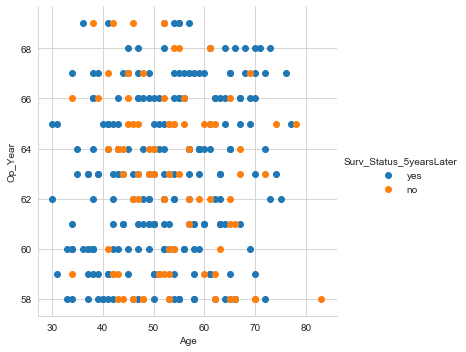

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(habs_data, hue='Surv_Status_5yearsLater',height=5).map(plt.scatter,'Age','Op_Year').add_legend()
plt.show()

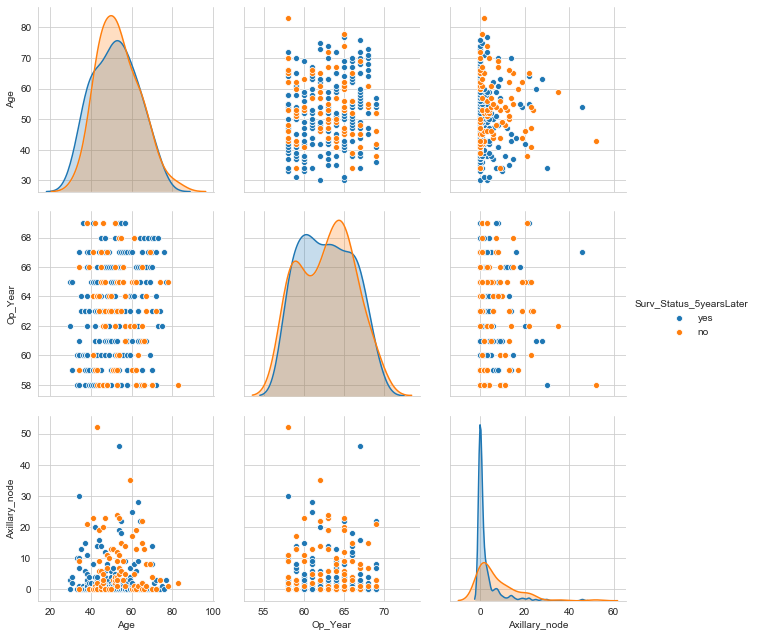

In [12]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(habs_data,hue='Surv_Status_5yearsLater',height=3)
plt.show()

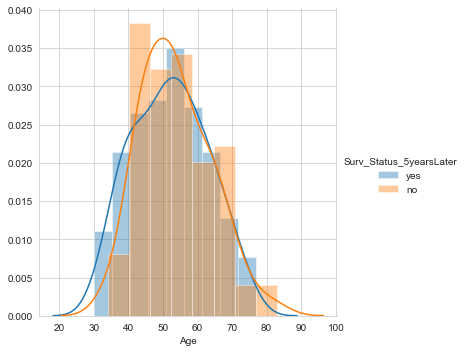

In [13]:
sns.FacetGrid(habs_data,hue='Surv_Status_5yearsLater', height=5).map(sns.distplot, "Age").add_legend()

In [14]:
habs_data['Surv_Status_5yearsLater'].unique()

array(['yes', 'no'], dtype=object)

#### Univariate Analysis

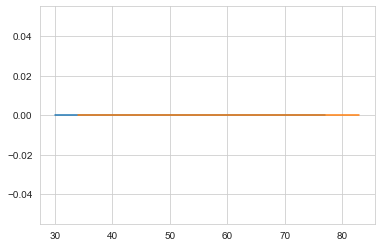

In [15]:
habs_cured = habs_data.loc[habs_data['Surv_Status_5yearsLater'] == 'yes']
habs_notcured = habs_data.loc[habs_data['Surv_Status_5yearsLater'] == 'no']

plt.plot(habs_cured['Age'], np.zeros_like(habs_cured['Age']))
plt.plot(habs_notcured['Age'], np.zeros_like(habs_notcured['Age']))

# plt.plot(habs_cured['Op_Year'], np.zeros_like(habs_cured['Op_Year']))
# plt.plot(habs_notcured['Op_Year'], np.zeros_like(habs_notcured['Op_Year']))

# plt.plot(habs_cured['Axillary_node'], np.zeros_like(habs_cured['Axillary_node']))
# plt.plot(habs_notcured['Axillary_node'], np.zeros_like(habs_notcured['Axillary_node']))

plt.show()

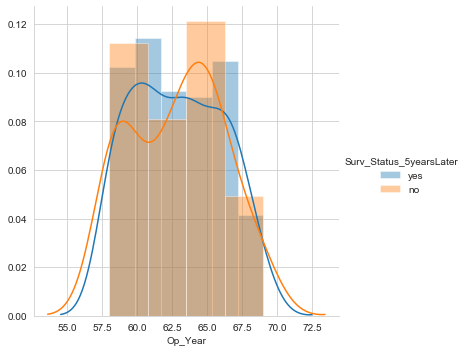

In [16]:
sns.FacetGrid(habs_data,hue='Surv_Status_5yearsLater', height=5).map(sns.distplot, "Op_Year").add_legend()

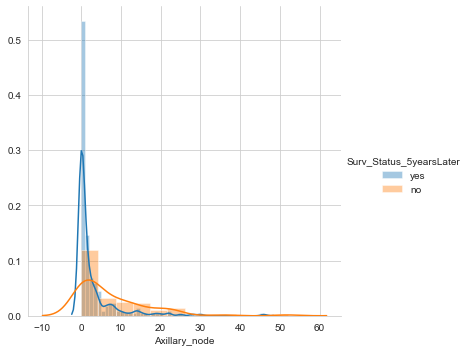

In [17]:
sns.FacetGrid(habs_data,hue='Surv_Status_5yearsLater', height=5).map(sns.distplot, "Axillary_node").add_legend()

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


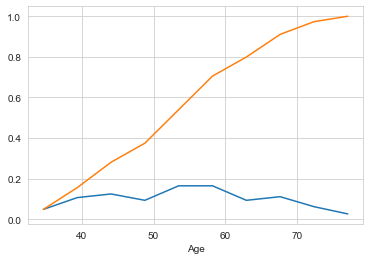

In [18]:
## Plot the CDF of Survived_Status_5yearsLater

counts, bin_edges = np.histogram(habs_cured['Age'],bins=10,density=True)

pdf = counts/sum(counts)

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age')
plt.show()

In [19]:
habs_data.columns

Index(['Age', 'Op_Year', 'Axillary_node', 'Surv_Status_5yearsLater'], dtype='object')

PDF AGE: [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
BIN-EDEGES AGE: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF UNCURED AGE: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
BIN_EDEGES UNCURED AGE: [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]
----------------------------------------------------------------------------------------------------
PDF OPYEAR: [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
BIN_EDGES OPYEAR: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF UNCURED-OPYEAR: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
BIN_EDGES UNCURED-OPYEAR: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
---------------------

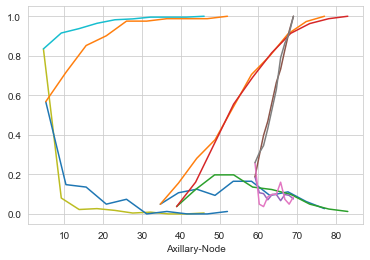

In [20]:
# Plot CDF of Age

# for cured Age :
counts, bin_edges = np.histogram(habs_cured['Age'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF AGE: {}'.format(pdf))
print('BIN-EDEGES AGE: {}'.format(bin_edges))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# for Uncured-Age :
counts, bin_edges = np.histogram(habs_notcured['Age'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF UNCURED AGE: {}'.format(pdf))
print('BIN_EDEGES UNCURED AGE: {}'.format(cdf))

print('-'*100)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age')
# for Operation Year :
counts, bin_edges = np.histogram(habs_cured['Op_Year'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF OPYEAR: {}'.format(pdf))
print('BIN_EDGES OPYEAR: {}'.format(bin_edges))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# for Operation Year :
counts, bin_edges = np.histogram(habs_notcured['Op_Year'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF UNCURED-OPYEAR: {}'.format(pdf))
print('BIN_EDGES UNCURED-OPYEAR: {}'.format(bin_edges))

print('-'*100)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Operation-year')

# for Positive Axillary_node :
counts, bin_edges = np.histogram(habs_cured['Axillary_node'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF AXILLARY-NODE: {}'.format(pdf))
print('BIN_EDGES AXILLARY-NODE: {}'.format(bin_edges))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# for Positive Axillary node :
counts, bin_edges = np.histogram(habs_notcured['Axillary_node'],bins=10,density=True)

pdf = counts/sum(counts)
print('PDF NOT-CUREDAXILLARY_NODE: {}'.format(pdf))
print('BIN_EDGES NOT-CUREDAXILLARY_NODE: {}'.format(bin_edges))

print('-'*100)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Axillary-Node')


plt.show()

--------------------------------------------------Age--------------------------------------------------
BIN-EDGES : Age : [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF : Age : [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF : Age :[0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]
--------------------------------------------------Op_Year--------------------------------------------------
BIN-EDGES : Op_Year : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF : Op_Year : [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF : Op_Year :[0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]
--------------------------------------------------Axillary_node--------------------------------------------------
BIN-EDGES : Axi

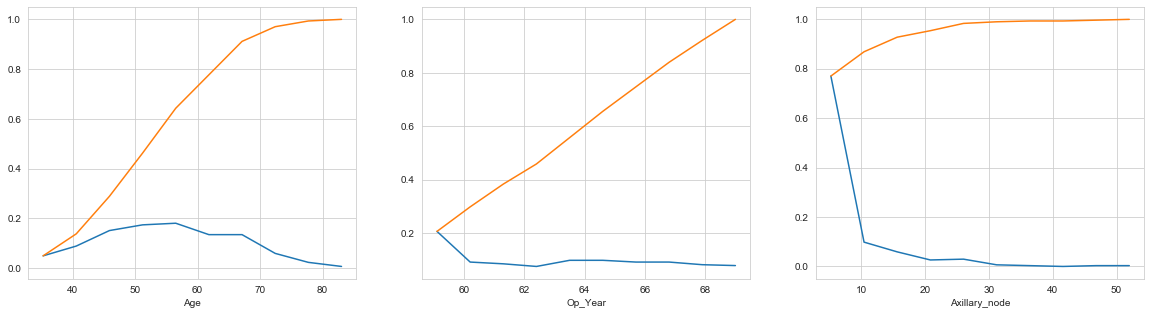

In [21]:
# Elaboratory CDF Visualization

plt.figure(figsize=(20,5))

for idx, feature in enumerate(list(habs_data.columns)[:-1]):
    plt.subplot(1,3,idx+1)
    print('-'*50+feature+'-'*50)
    counts, bin_edges = np.histogram(habs_data[feature],bins=10,density=True)
    print('BIN-EDGES : {} : {}'.format(feature,bin_edges))
    pdf = counts/sum(counts)
    print('PDF : {} : {}'.format(feature,pdf))
    cdf =np.cumsum(pdf)
    print('CDF : {} :{}'.format(feature,cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

In [22]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(habs_cured["Axillary_node"]))
#Median with an outlier
print(np.median(np.append(habs_cured["Axillary_node"],50)));
print(np.median(habs_notcured["Axillary_node"]))

print("\nQuantiles:")
print(np.percentile(habs_cured["Axillary_node"],np.arange(0, 100, 25)))
print(np.percentile(habs_notcured["Axillary_node"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(habs_cured["Axillary_node"],90))
print(np.percentile(habs_notcured["Axillary_node"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(habs_cured["Axillary_node"]))
print(robust.mad(habs_notcured["Axillary_node"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408
